In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scikitplot.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [2]:
import pandas as pd
df = pd.read_csv("../input/clean-16-million-tweets/clean_tweets_again.csv")

In [3]:
df.dropna(inplace = True)
df.drop(columns = 'Unnamed: 0',inplace = True)

In [4]:
X = df['text']
y = df['sentiment']

In [5]:
# the data is split in 98|1|1
from sklearn.model_selection import train_test_split
X_train,X_validation_test,y_train,y_validation_test = train_test_split(X,y,test_size = 0.02,random_state = 45)

In [6]:
X_validation,X_test,y_validation,y_test = train_test_split(X_validation_test,y_validation_test,test_size = 0.5,random_state = 45)

In [7]:
clf_lr = LogisticRegression(verbose = 35,n_jobs = -1)
tfidf_lr = TfidfVectorizer(max_features = 950000,stop_words =None,ngram_range = (1,3))
lr_pipeline = Pipeline([('vectorizer',tfidf_lr),('classifier',clf_lr)],verbose = True)
lr_pipeline.fit(X_train,y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total= 4.3min


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Pipeline] ........ (step 2 of 2) Processing classifier, total= 5.7min


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  5.7min finished


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0,
                                 max_features=950000, min_df=1,
                                 ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                          

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7865
           1       0.84      0.82      0.83      8096

    accuracy                           0.83     15961
   macro avg       0.83      0.83      0.83     15961
weighted avg       0.83      0.83      0.83     15961

The accuracy score is 0.8272038092851325


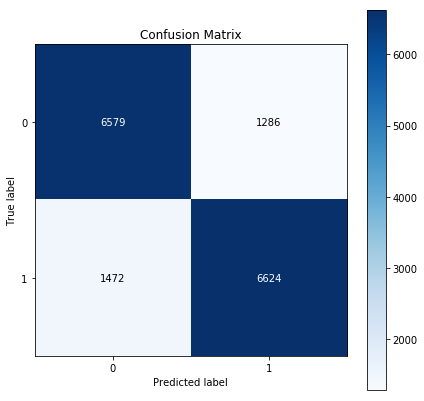

In [8]:
pred = lr_pipeline.predict(X_test)
print(classification_report(pred,y_test))
print('The accuracy score is',accuracy_score(pred,y_test))
plot_confusion_matrix(pred, y_test,figsize=(7,7))

In [9]:
from sklearn.svm import LinearSVC
clf_lsvc_r = LinearSVC(verbose = 35,penalty = 'l1',dual = False)
tfidf_lsvc_r = TfidfVectorizer(max_features = 950000,stop_words =None,ngram_range = (1,3))
lsvc_r_pipeline = Pipeline([('vectorizer',tfidf_lsvc_r),('classifier',clf_lsvc_r)],verbose = True)
lsvc_r_pipeline.fit(X_train,y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total= 4.4min
[LibLinear][Pipeline] ........ (step 2 of 2) Processing classifier, total= 5.3min


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0,
                                 max_features=950000, min_df=1,
                                 ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LinearSVC(C=1.0, class_weight=None, dual=False,
                           fit_inte

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      7874
           1       0.83      0.81      0.82      8087

    accuracy                           0.82     15961
   macro avg       0.82      0.82      0.82     15961
weighted avg       0.82      0.82      0.82     15961

The accuracy score is 0.8216277175615563


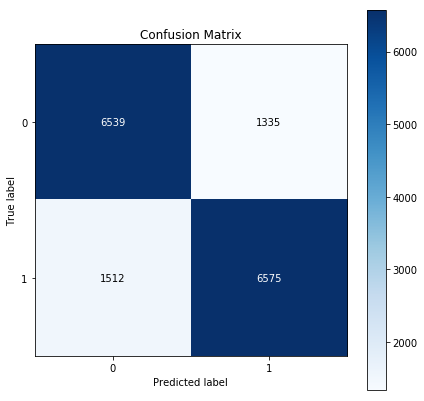

In [10]:
pred = lsvc_r_pipeline.predict(X_test)
print(classification_report(pred,y_test))
print('The accuracy score is',accuracy_score(pred,y_test))
plot_confusion_matrix(pred, y_test,figsize=(7,7))

In [11]:
from sklearn.svm import LinearSVC
clf_lsvc_l = LinearSVC(verbose = 35,penalty = 'l2')
tfidf_lsvc_l = TfidfVectorizer(max_features = 950000,stop_words =None,ngram_range = (1,3))
lsvc_l_pipeline = Pipeline([('vectorizer',tfidf_lsvc_l),('classifier',clf_lsvc_l)],verbose = True)
lsvc_l_pipeline.fit(X_train,y_train)

[Pipeline] ........ (step 1 of 2) Processing vectorizer, total= 4.4min
[LibLinear][Pipeline] ........ (step 2 of 2) Processing classifier, total=  58.5s


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0,
                                 max_features=950000, min_df=1,
                                 ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_inter

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      7915
           1       0.82      0.81      0.82      8046

    accuracy                           0.82     15961
   macro avg       0.82      0.82      0.82     15961
weighted avg       0.82      0.82      0.82     15961

The accuracy score is 0.8164275421339515


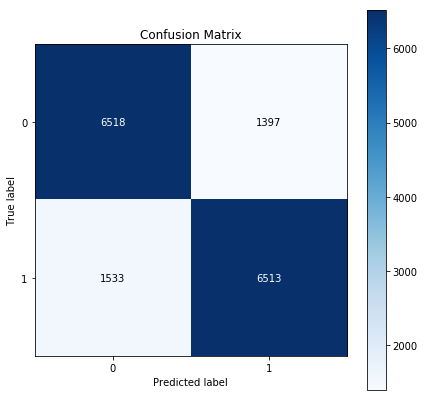

In [12]:
pred = lsvc_l_pipeline.predict(X_test)
print(classification_report(pred,y_test))
print('The accuracy score is',accuracy_score(pred,y_test))
plot_confusion_matrix(pred, y_test,figsize=(7,7))